## 异常检测 - LOF

In [60]:
import numpy as np
import pandas as pd
import time as time
from sklearn.neighbors import LocalOutlierFactor as LOF
from sklearn.metrics import precision_recall_curve, roc_auc_score, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

#### 训练集（未经标准化）

In [61]:
train_data = pd.read_csv("train_data.csv", skiprows=1, header=None)
test_data = pd.read_csv("test_data.csv", skiprows=1, header=None)

In [62]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,198
0,0,0.115937,72,74,4238,63516,1250.679227,31,29,2.884325e+05,...,False,True,False,False,False,False,False,False,Normal,0
1,1,0.257944,8,12,424,8824,73.659402,31,29,1.150637e+04,...,False,True,False,False,False,False,False,False,Normal,0
2,2,0.000007,2,0,900,0,142857.140900,254,0,5.142857e+08,...,False,False,True,False,False,False,False,False,Normal,0
3,3,0.052844,60,62,3614,50036,2289.758573,31,29,5.380365e+05,...,False,True,False,False,False,False,False,False,Normal,0
4,4,0.001032,2,2,146,178,2906.976908,31,29,5.658915e+05,...,False,False,False,False,False,False,False,False,Normal,0


In [63]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,198
0,0,0.600851,6,2,978,86,11.650143,62,252,1.085128e+04,...,False,False,False,False,False,False,False,False,Normal,0
1,1,0.000944,2,2,130,162,3177.966006,31,29,5.508474e+05,...,False,False,False,False,False,False,False,False,Normal,0
2,2,0.001040,2,2,146,178,2884.615377,31,29,5.615384e+05,...,False,False,False,False,False,False,False,False,Normal,0
3,3,1.052931,10,10,804,1152,18.044868,62,252,5.500835e+03,...,False,True,False,False,False,False,False,False,Normal,0
4,4,0.000005,2,0,200,0,200000.005100,254,0,1.600000e+08,...,False,False,True,False,False,False,False,False,Analysis,1


In [64]:
y_train = train_data[198].values
attributes = train_data.iloc[:, 1:-2]

In [65]:
attributes.head()

,1,2,3,4,5,6,7,8,9,10,...,187,188,189,190,191,192,193,194,195,196
0,0.115937,72,74,4238,63516,1250.679227,31,29,2.884325e+05,4.323590e+06,...,False,False,False,True,False,False,False,False,False,False
1,0.257944,8,12,424,8824,73.659402,31,29,1.150637e+04,2.508762e+05,...,False,False,False,True,False,False,False,False,False,False
2,0.000007,2,0,900,0,142857.140900,254,0,5.142857e+08,0.000000e+00,...,False,False,False,False,True,False,False,False,False,False
3,0.052844,60,62,3614,50036,2289.758573,31,29,5.380365e+05,7.452729e+06,...,False,False,False,True,False,False,False,False,False,False
4,0.001032,2,2,146,178,2906.976908,31,29,5.658915e+05,6.899225e+05,...,False,True,False,False,False,False,False,False,False,False


In [66]:
attributes = attributes.astype(np.float32)

In [67]:
attributes.head()

,1,2,3,4,5,6,7,8,9,10,...,187,188,189,190,191,192,193,194,195,196
0,0.115937,72.0,74.0,4238.0,63516.0,1250.679199,31.0,29.0,2.884325e+05,4.323590e+06,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.257944,8.0,12.0,424.0,8824.0,73.659401,31.0,29.0,1.150637e+04,2.508762e+05,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000007,2.0,0.0,900.0,0.0,142857.140625,254.0,0.0,5.142857e+08,0.000000e+00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.052844,60.0,62.0,3614.0,50036.0,2289.758545,31.0,29.0,5.380365e+05,7.452729e+06,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001032,2.0,2.0,146.0,178.0,2906.976807,31.0,29.0,5.658915e+05,6.899225e+05,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
lof = LOF(novelty=True)
lof.fit(attributes)

LocalOutlierFactor(novelty=True)

In [69]:
decision_boundary = lof.decision_function(attributes)
decision_boundary

array([ 0.5049685 ,  0.51216763,  0.5015119 , ...,  0.49104726,
        0.4911505 , -0.19365084], dtype=float32)

In [97]:
fpr, tpr, thresholds = roc_curve(y_train, decision_boundary, pos_label=0)
auc_score = auc(fpr, tpr)

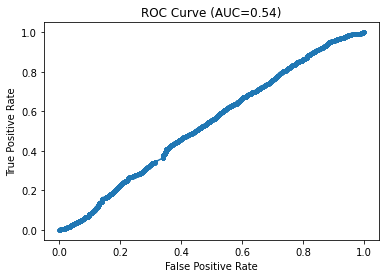

In [98]:
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC={:.2f})'.format(auc_score))
plt.show()

In [107]:
precision, recall, thresholds = precision_recall_curve(y_train, decision_boundary, pos_label=0)
auprc = auc(recall, precision)

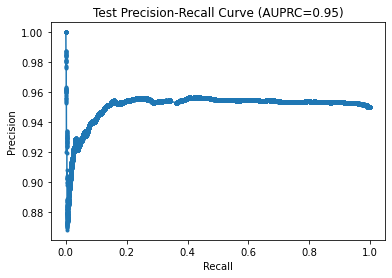

In [108]:
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Test Precision-Recall Curve (AUPRC={:.2f})'.format(auprc))
plt.show()

#### 测试集（未经标准化）

In [74]:
y_test = test_data[198].values
test_attr = test_data.iloc[:, 1:-2]
test_attr = test_attr.astype(np.float32)
test_attr.head()

,1,2,3,4,5,6,7,8,9,10,...,187,188,189,190,191,192,193,194,195,196
0,0.600851,6.0,2.0,978.0,86.0,11.650143,62.0,252.0,1.085128e+04,572.521301,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000944,2.0,2.0,130.0,162.0,3177.966064,31.0,29.0,5.508474e+05,686440.687500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001040,2.0,2.0,146.0,178.0,2884.615479,31.0,29.0,5.615384e+05,684615.375000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.052931,10.0,10.0,804.0,1152.0,18.044868,62.0,252.0,5.500835e+03,7878.958984,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000005,2.0,0.0,200.0,0.0,200000.000000,254.0,0.0,1.600000e+08,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [75]:
test_start = time.time()
test_predictions = lof.predict(test_attr)
test_end = time.time()
print("Running Time:", test_end - test_start, "seconds")

Running Time: 7.541407346725464 seconds


In [76]:
test_boundary = lof.decision_function(test_attr)
test_boundary

array([0.509853  , 0.4519807 , 0.46108556, ..., 0.456084  , 0.5063535 ,
       0.18372655], dtype=float32)

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, test_boundary, pos_label=0)
auc_score = auc(fpr, tpr)

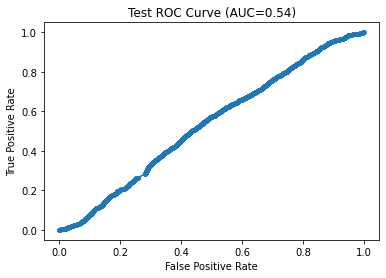

In [78]:
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC Curve (AUC={:.2f})'.format(auc_score))
plt.show()

In [79]:
print("AUROC of test data:", auc_score)

AUROC of test data: 0.5352472899999827


In [89]:
precision, recall, thresholds = precision_recall_curve(y_test, test_boundary, pos_label=0)
auprc = auc(recall, precision)

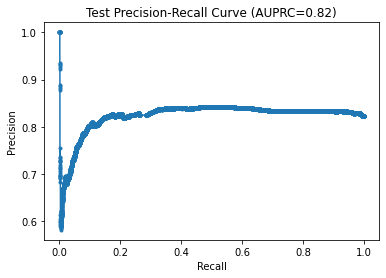

In [90]:
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Test Precision-Recall Curve (AUPRC={:.2f})'.format(auprc))
plt.show()

In [82]:
print("AUPRC of test data:", auprc)

AUPRC of test data: 0.8232537833984652
